In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/dogscats/"

In [5]:
sz = 224

In [6]:
!ls {PATH}


models	sample	test1  tmp  train  valid


In [7]:
!ls {PATH}valid # same as !ls {PATH}/valid

cats  dogs


In [8]:
files = !ls {PATH}valid/cats | head #head refers to a few lines of any text input
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

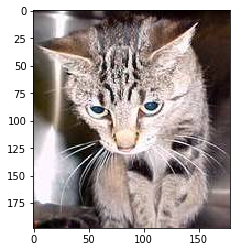

In [9]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}') #convert an image to an array matplotlib
plt.imshow(img) #display img(array) on the axes


In [10]:
img.shape #tuple of array of dimensions (y-axis, x-axis, elements in array)

(198, 179, 3)

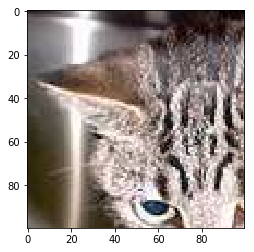

In [11]:
plt.imshow(img[:100,:100]) #img(:y-axis, :x-axis)

In [12]:
!rm -rf {PATH}tmp

In [13]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|██████████| 32/32 [00:09<00:00,  3.39it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.04756 0.02382 0.99023]                             
[1.      0.03553 0.02339 0.99072]                             
[2.      0.04074 0.02602 0.98975]                             



## Learning Rate

In [14]:
learn = ConvLearner.pretrained(arch, data, precompute = True)

In [15]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████▏ | 293/360 [00:05<00:01, 58.51it/s, loss=0.434]


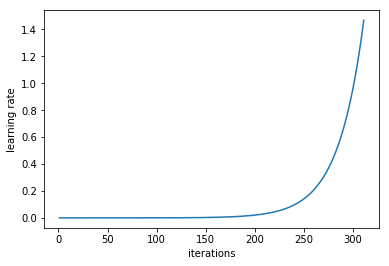

In [16]:
learn.sched.plot_lr()

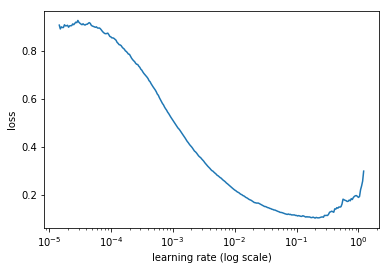

In [17]:
learn.sched.plot()

## Data Augmentation


In [18]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#aug_tfms = augmentation transformstions

In [19]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [20]:
ims = np.stack([get_augs() for i in range(6)])

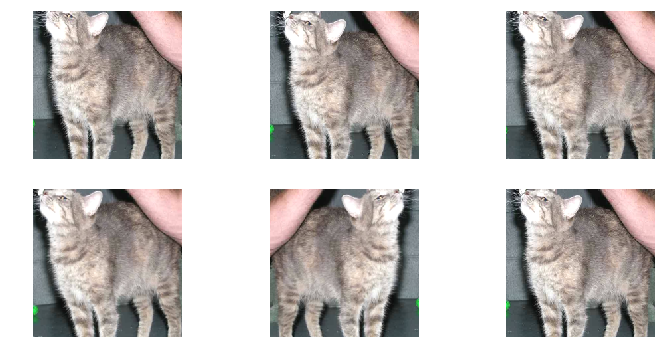

In [21]:
plots(ims, rows=2)

In [22]:
data = ImageClassifierData.from_paths(PATH, tfms = tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True) #precompute means pretrained

In [23]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[0.      0.04489 0.02692 0.98975]                             



In [24]:
learn.precompute=False

In [25]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.04381 0.02474 0.98877]                             
[1.      0.04049 0.02474 0.98779]                             
[2.      0.04013 0.02503 0.99072]                             



[0.  train loss | validation loss | accuracy]

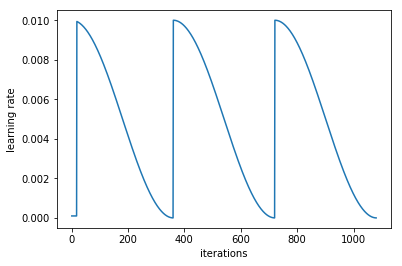

In [26]:
learn.sched.plot_lr()

In [27]:
learn.save('224_lastlayer')

In [28]:
learn.unfreeze()

In [ ]:
lr = np.array([1e-4, 1e-3, 1e-2]) #([])

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

 30%|███       | 108/360 [01:37<03:47,  1.11it/s, loss=0.066] 

In [1]:
learn.sched.plot_lr()

NameError: name 'learn' is not defined